<a href="https://colab.research.google.com/github/Mohan75489/DeepLearning_PyTorch/blob/main/PyTorch_Images_and_LR_with_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import all required libraries
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
#downloading training dataset
dataset = MNIST(root = 'data/', download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [3]:
#to check the loaded dataset length
len(dataset)

60000

In [10]:
#checking test data length and we don't want to train using this. This is only for showing efficiency of built model.
test_dataset = MNIST(root='data/',train=False)
len(test_dataset)

10000

In [5]:
#checking a random sample
dataset[5]

(<PIL.Image.Image image mode=L size=28x28 at 0x7FD4177F9790>, 2)

- First part is image. It's part of a python library is called Pillow (python interpreted of image)
- Second part, is the size of the image.
-Third part, is the label/value in the image.

In [6]:
#to view the image, importing matplotlib
import matplotlib.pyplot as plt
#to show plots in the notebook, instead of pop-up (anything that begins with % sign is called magic command)
%matplotlib inline 

Label: 3


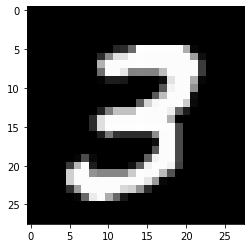

In [11]:
#plotting an image from the dataset. Note image and lable properties of image in dataset.
image, label = dataset[7]
plt.imshow(image, cmap='gray')
print('Label:',label)

In [8]:
#PyTorch operates in tensors, it doesn't know images. It requires transformation of images to tensors.
import torchvision.transforms as transforms

In [12]:
#tranforming dataset to tensors for training, and redefining it. and making it available for training.
dataset = MNIST(root = 'data/', train=True, transform = transforms.ToTensor())

In [13]:
#printing tranformed tensor to view shape
img_tensor, label = dataset[0]
print(img_tensor.shape,label)

torch.Size([1, 28, 28]) 5


- Image is converted into 3D tensor, 1 represents colour, 28 and 28 represent x and y dimension.
- So, each pixel is conveted into an elelemtn of tensor.
- First one is colour channel, for colured image it have 3 parts (Red, Green, Blue).

In [15]:
#looking a some pixels from a specific image.
print(img_tensor[:,10:15,10:15])
#To understand colour variation. 
print(torch.max(img_tensor),torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


- Element represent colur of pixel.
- 1 is for Black and 0 is for White, everything in between are shades of gray.

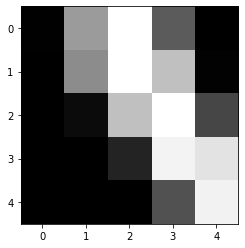

In [16]:
#plotting a 10-15 vertical and horizontal elements of tensor
plt.imshow(img_tensor[0,10:15,10:15],cmap='gray')

In [18]:
#splitting the data into 3 sets.
#training dataset, some 50000 images of 60000.
#validation dataset, remaining 10000 images of 60000.
#test dataset, which is given separately in MNIST, 10000.

#splitting 60000 between training and validation set randomly.
from torch.utils.data import random_split
train_ds, val_ds = random_split(dataset,[50000,10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [34]:
#dataloding in batches, training dataset with shuffle on. Validation set no shuffling needed, at least for now.
from torch.utils.data import DataLoader
#smaller batches reduces time to calculate gradients.
batch_size = 125
train_loader = DataLoader(train_ds,batch_size,shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

- nn.linear expects vector as inout/2D tensor.
- Each image is group of pixels/element in the tensor.
- Other way of saying above point, number of inputs=number of pixels in image.
- All images in MNIST are 28x28 pixels (or) 784 inputs.
- We are prediction which class the image belongs to (0-9) (or) output would be a tensor with 10 elements (10 outputs).

In [35]:
#creating a model.
import torch.nn as nn
input_size = 28*28
num_classes = 10
#logestic-regression model for a image.
model = nn.Linear(input_size, num_classes)

In [36]:
#printing model weight shape.
print(model.weight.shape)
#printing intial weight tensor.
print(model.weight)
#printing model bias shape.
print(model.bias.shape)
#printing initial bias tensor.
model.bias

torch.Size([10, 784])
Parameter containing:
tensor([[-0.0079, -0.0248,  0.0250,  ..., -0.0352, -0.0120, -0.0148],
        [-0.0142,  0.0353, -0.0145,  ..., -0.0066, -0.0094,  0.0240],
        [ 0.0086, -0.0335,  0.0053,  ...,  0.0008, -0.0082, -0.0074],
        ...,
        [-0.0082, -0.0313, -0.0220,  ..., -0.0057,  0.0133, -0.0159],
        [-0.0223, -0.0091, -0.0346,  ..., -0.0080, -0.0234, -0.0250],
        [ 0.0041, -0.0015,  0.0157,  ..., -0.0296,  0.0222, -0.0104]],
       requires_grad=True)
torch.Size([10])


Parameter containing:
tensor([-0.0110, -0.0187,  0.0095, -0.0135, -0.0196,  0.0114,  0.0220, -0.0295,
        -0.0250, -0.0014], requires_grad=True)

In [38]:
#passing image to developed model in batches.
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    print(outputs)
    break

tensor([4, 5, 0, 7, 0, 0, 7, 3, 2, 4, 0, 2, 0, 1, 8, 7, 6, 7, 6, 6, 8, 2, 6, 2,
        8, 9, 3, 6, 8, 4, 9, 7, 0, 7, 7, 5, 8, 0, 3, 8, 3, 4, 5, 5, 5, 6, 7, 5,
        1, 7, 4, 9, 0, 8, 7, 9, 6, 1, 9, 2, 1, 4, 0, 7, 9, 0, 1, 2, 1, 1, 7, 3,
        6, 5, 9, 8, 2, 9, 2, 1, 3, 8, 6, 1, 2, 4, 8, 5, 2, 6, 8, 5, 4, 8, 4, 7,
        6, 0, 3, 6, 4, 7, 4, 9, 4, 3, 8, 6, 1, 7, 0, 5, 5, 2, 4, 2, 3, 4, 9, 1,
        8, 0, 5, 5, 7])
torch.Size([125, 1, 28, 28])


RuntimeError: ignored

- We followed sma eprocedure as linear regression, but error occured because we are asking linear regression for "125"/batch size times.
- We know each image has 784 inputs and 10 outputs.
- We discussed nn.lineaar can handle 2D tensors only.

In [40]:
#target is to rehape input/images to 2D tensor.
#we can use rehspe operation of tensor.
images.reshape(125,784).shape

torch.Size([125, 784])

- It is not practical to do it/pass it for each different batch sizes. User can give any batch sie.
- Technique is to extend existing nn.Module calss to add customized classes to work in this notebook.

In [44]:
#Adding customized class extension for nn.Module.
class Mnistmodel(nn.Module):
  #Constructor of class init
    def init(self): #self is current batch. default fuction.
        super().init #special line to make init is calss under nn.Module
        self.linear = nn.Linear(input_size,num_classes)
    #init class function
    def forward(self,xb):
          #-1 is the key here, based on passed bacth size it can autocaculate it. 
          #limitation is we need to give inputs/should know image size.
          xb = xb.reshape(-1,784)
          out = self.Linear(xb)
          return out

#redefining the model to this Mnistmodel
model = Mnistmodel()